
# Task 2: Credit Risk Prediction

## Objective
Predict whether a loan applicant is likely to default on a loan.

## Dataset
Loan Prediction Dataset (Kaggle)  
Files used:
- train.csv (with Loan_Status)
- test.csv (without Loan_Status)


## 1. Import Required Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


## 2. Load Training Dataset

In [2]:

# Load training dataset
train_df = pd.read_csv("E:\internship datasets\Train.csv")

# Display first five rows
train_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3. Dataset Information

In [3]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## 4. Handle Missing Values

In [4]:

# Fill missing categorical values with mode
for col in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Fill missing numerical values with mean
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(), inplace=True)


## 5. Exploratory Data Analysis (EDA)

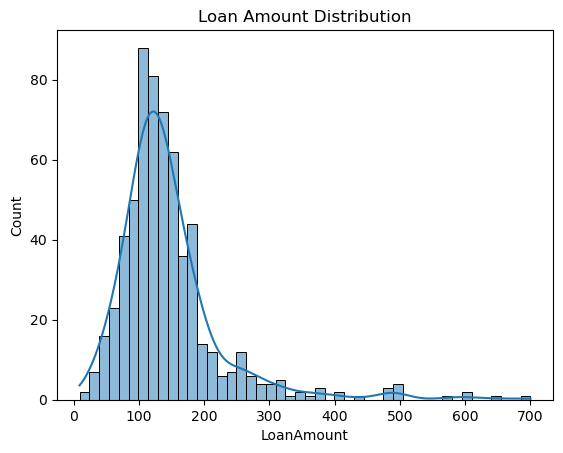

In [16]:
# Loan Amount Distribution
sns.histplot(train_df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()


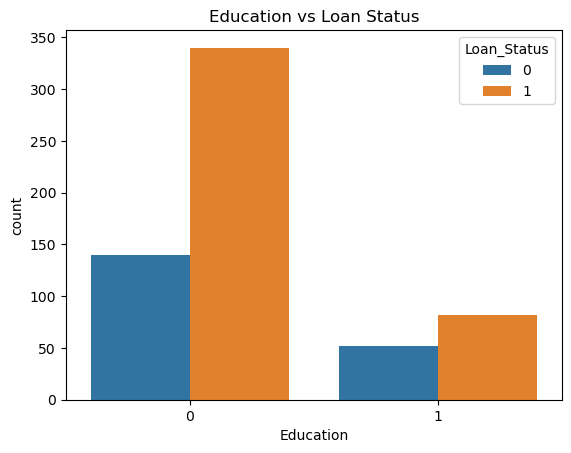

In [14]:
# Education vs Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=train_df)
plt.title("Education vs Loan Status")
plt.show()

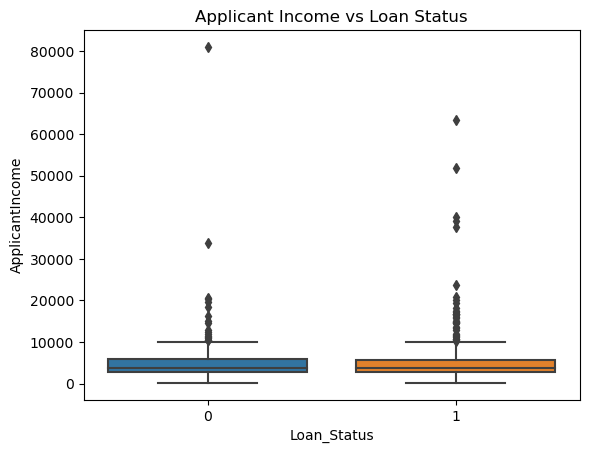

In [15]:
# Applicant Income vs Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train_df)
plt.title("Applicant Income vs Loan Status")
plt.show()


## 6. Encode Categorical Variables

In [6]:

le = LabelEncoder()

for col in train_df.select_dtypes(include='object'):
    train_df[col] = le.fit_transform(train_df[col])


## 7. Feature Selection

In [7]:

X = train_df.drop('Loan_Status', axis=1)
y = train_df['Loan_Status']


## 8. Train-Test Split

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 9. Feature Scaling

In [9]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 10. Logistic Regression Model

In [10]:

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]


## 11. Decision Tree Model

In [11]:

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.6991869918699187
Confusion Matrix:
 [[23 20]
 [17 63]]


## 12. Load Test Dataset and Predict

In [12]:

# Load test dataset (no Loan_Status)
test_df = pd.read_csv("E:\internship datasets\Test.csv")

# Handle missing values same as training data
for col in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

test_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(), inplace=True)

# Encode categorical variables
for col in test_df.select_dtypes(include='object'):
    test_df[col] = le.fit_transform(test_df[col])

# Scale test data
test_scaled = scaler.transform(test_df)

# Predict loan status
test_predictions = lr.predict(test_scaled)

# Add predictions to dataset
test_df['Loan_Status_Predicted'] = test_predictions

test_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Predicted
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,1
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,1
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,1
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1


## 13. Save Predictions

In [13]:

test_df.to_csv("final_loan_predictions.csv", index=False)
print("Prediction file saved successfully")


Prediction file saved successfully



## Conclusion
In this project, missing values were handled, EDA was performed, and machine learning models
(Logistic Regression and Decision Tree) were trained. The models were evaluated using accuracy
and confusion matrix. Final predictions were generated on a separate test dataset.
